# Assignment 1: Evolutionary Process Discovery
---

### 1. 🟢

(5 points) Implement the GA using deap.algorithms.eaSimple method in DEAP. Please
use [‘cxTwoPoint’, ‘mutFlipBit’, ‘selTournament’] as the [Crossover, Mutation, Selection]
operators, record the default parameter of your initial GA and plot the best fitness at
each iteration 

In [3]:
# Import Libraries
from deap import base, creator, tools, algorithms
import random
import numpy as np
import pandas as pd
import time
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the current working directory is in the python path
import sys
sys.path.append('..')

# Ensure Graphviz is in the path
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from support import *


In [33]:
g = np.random.randint(-1, 2)
print(g)

0


gen	nevals	avg    	std    	min 	max  
0  	300   	150.869	84.5644	-9.1	420.2
1  	166   	208.071	69.9046	46.8	420.2
2  	171   	262.52 	72.8571	47.8	477.6
3  	186   	299.647	73.6251	72.2	477.6
4  	198   	327.54 	75.0656	75.3	477.4
5  	177   	358.618	67.9288	27.8	456.8
6  	183   	382.532	65.3523	88.9	475.6
7  	170   	399.673	61.8811	68.9	475.8
8  	185   	404.895	55.2483	100.4	512.7
9  	174   	410.49 	59.3636	102.2	512.9
10 	197   	420.456	59.5472	96.5 	513.1
11 	188   	424.611	66.3661	111.3	513.3
12 	159   	434.138	65.0054	138.3	513.5
13 	166   	440.707	63.3491	177.4	514.2
14 	200   	446.096	71.1094	176.6	514.1
15 	168   	464.178	71.1375	118.7	515.1
16 	185   	488.492	61.9151	119  	533.4
17 	188   	495.134	61.9183	129.5	533.2
18 	173   	491.334	63.5071	129.2	533.5
19 	180   	497.257	58.0529	138.5	533.9
20 	172   	494.942	71.6326	82.1 	533.9
21 	157   	506.968	56.7372	119  	534.2
22 	189   	505.157	62.3697	248  	534.2
23 	176   	511.931	66.6553	72.5 	534.4
24 	191   	505.355	75.0479	160.7	5

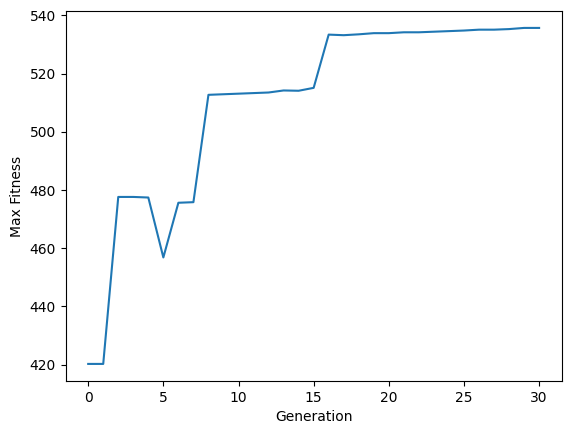

In [2]:
# Create the types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_int", np.random.randint, -1, 2)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=PLACES*TRANSITIONS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
pop = toolbox.population(n=300)

# Record the evolution
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the GA
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)

# Plot the best fitness at each iteration
gen, max_ = log.select("gen", "max")
plt.plot(gen, max_)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.show()

Then you have to investigate the performance of the GA: in task 2 and 3 that you will do,
check the distribution of the fitness values of the best solution found across 30 runs by
creating boxplots. Also, check the average best fitness(ABF) at each iteration (over 30 runs)
to verify possible premature convergence by creating line plots. The Figure 3 is an example of
multiple line plots and boxplots for reference (please notice that we have a maximization
problem here and the line plot might look different).

In [3]:
# Initialize lists to store the results
best_fitness_runs = []
best_fitness_iterations = []

# Run the GA 30 times
for _ in range(10):
    # Create the population
    pop = toolbox.population(n=300)

    # Run the GA
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)

    # Record the best fitness found in this run
    best_fitness_runs.append(hof[0].fitness.values[0])

    # Record the best fitness at each iteration
    best_fitness_iterations.append(log.select("max"))


gen	nevals	avg    	std    	min  	max  
0  	300   	155.739	85.8714	-10.4	418.9
1  	184   	212.912	68.9011	11.2 	399.7
2  	166   	261.433	61.2773	30.7 	399.7
3  	164   	298.945	58.5991	99   	420.4
4  	162   	320.21 	62.2534	87.4 	420.1
5  	194   	341.251	61.236 	81.7 	438.1
6  	170   	355.292	61.1548	85.3 	458.2
7  	182   	372.392	55.5552	138.1	438.1
8  	170   	390.84 	51.7344	155.8	475.6
9  	185   	391.945	63.7048	162.5	475.6
10 	192   	400.177	58.774 	137.9	475.6
11 	194   	410.692	55.9346	166.1	475.8
12 	197   	418.338	54.8259	124.1	475.8
13 	176   	418.113	54.9005	166.8	533  
14 	178   	417.93 	64.9195	121.6	533.7
15 	179   	424.157	63.9998	119.2	533.7
16 	202   	433.815	73.1448	80.8 	533.7
17 	179   	455.941	70.4093	138.9	533.8
18 	177   	485.414	52.7475	139.3	533.8
19 	196   	509.046	37.6931	201.2	533.9
20 	174   	512.987	54.2697	80.9 	534.1
21 	203   	513.735	56.4373	101.5	534.3
22 	163   	515.278	52.2944	246.9	534.3
23 	179   	520.817	46.4805	81.4 	534.6
24 	180   	515.316	55.079

31
10


<Axes: >

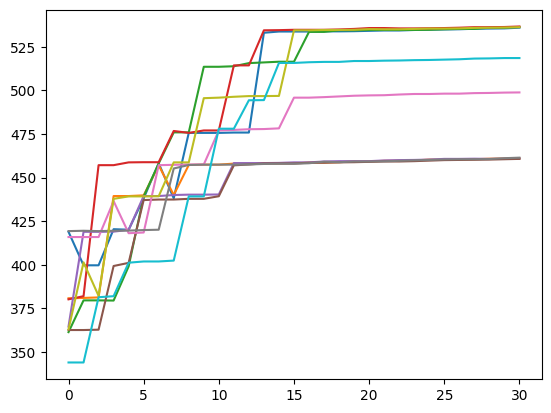

In [4]:
print(len(best_fitness_iterations[0]))
print(len(best_fitness_runs))
# print(best_fitness_runs)
pd.DataFrame(best_fitness_iterations).T.plot(legend=False)

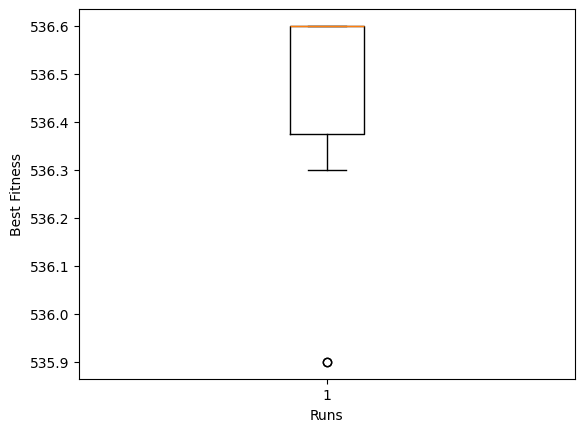

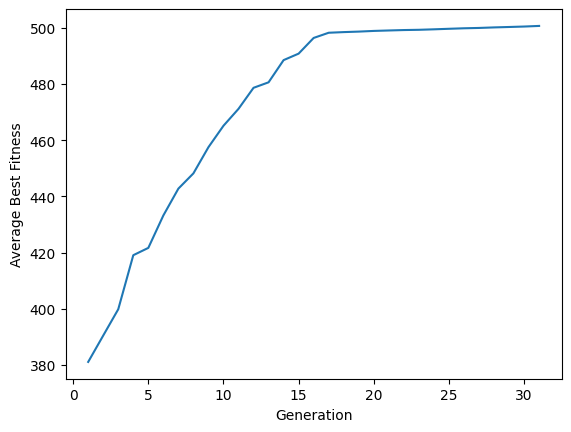

In [5]:

# Create a boxplot of the best fitness found in each run
plt.boxplot(best_fitness_runs)
plt.xlabel("Runs")
plt.ylabel("Best Fitness")
plt.show()

# Create a line plot of the average best fitness at each iteration
avg_best_fitness_iterations = np.mean(best_fitness_iterations, axis=0)
plt.plot(range(1, 32), avg_best_fitness_iterations)
plt.xlabel("Generation")
plt.ylabel("Average Best Fitness")
plt.show()

### 2. 🟢

(5 points) compare the performance of possible variants of your GA, e.g., using
different crossover, mutation, and selection operators. Test the variants in the table
below, and investigate both the impact to the optimization performances and the
overall running time, keep the best choice according to ABF for the later questions.
You can refer to the operators described in DEAP documentation: 

In [6]:


# Define the combinations of operators
combinations = [
    ("cxTwoPoint", "mutFlipBit", "selTournament"),
    ("cxTwoPoint", "mutFlipBit", "selRoulette"),
    ("cxTwoPoint", "mutShuffleIndexes", "selTournament"),
    ("cxTwoPoint", "mutShuffleIndexes", "selRoulette"),
    ("cxOrdered", "mutFlipBit", "selTournament"),
    ("cxOrdered", "mutFlipBit", "selRoulette"),
    ("cxOrdered", "mutShuffleIndexes", "selTournament"),
    ("cxOrdered", "mutShuffleIndexes", "selRoulette"),
]

# Initialize a list to store the results
results = []

# For each combination of operators
for cx, mut, sel in combinations:
    # Register the operators in the toolbox
    toolbox.register("mate", getattr(tools, cx))
    toolbox.register("mutate", getattr(tools, mut), indpb=0.05)
    if sel == "selTournament":
        toolbox.register("select", getattr(tools, sel), tournsize=3)
    else:
        toolbox.register("select", getattr(tools, sel))

    # Initialize lists to store the best fitness found in each run and at each iteration
    best_fitness_runs = []
    best_fitness_iterations = []

    # Start the timer
    start_time = time.time()

    # Run the GA 30 times
    for _ in range(3):
        # Create the population
        pop = toolbox.population(n=300)

        # Run the GA
        pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=False)

        # Record the best fitness found in this run
        best_fitness_runs.append(hof[0].fitness.values[0])

        # Record the best fitness at each iteration
        best_fitness_iterations.append(log.select("max"))

    # Calculate the ABF and the running time
    abf = np.mean(best_fitness_runs)
    running_time = time.time() - start_time

    # Add the results to the list
    results.append((cx, mut, sel, abf, running_time))

# Convert the list of results to a pandas DataFrame and display it
df = pd.DataFrame(results, columns=["Crossover", "Mutation", "Selection", "ABF", "Time (Seconds)"])
print(df)

# Select the best combination of operators
best = df.loc[df["ABF"].idxmax()]
print(best)

    Crossover           Mutation      Selection    ABF  Time (Seconds)
0  cxTwoPoint         mutFlipBit  selTournament  536.6       18.645885
1  cxTwoPoint         mutFlipBit    selRoulette  536.6       18.741563
2  cxTwoPoint  mutShuffleIndexes  selTournament  536.6       21.802984
3  cxTwoPoint  mutShuffleIndexes    selRoulette  536.6       18.576603
4   cxOrdered         mutFlipBit  selTournament  536.6       21.405392
5   cxOrdered         mutFlipBit    selRoulette  536.6       18.025074
6   cxOrdered  mutShuffleIndexes  selTournament  536.6       19.007598
7   cxOrdered  mutShuffleIndexes    selRoulette  536.6       20.115277
Crossover            cxTwoPoint
Mutation             mutFlipBit
Selection         selTournament
ABF                       536.6
Time (Seconds)        18.645885
Name: 0, dtype: object


In [7]:
# Select best index
best_index = df["ABF"].idxmax()
cx, mut, sel = combinations[best_index]

# Register the best performing operators in the toolbox
toolbox.register("mate", getattr(tools, cx))
toolbox.register("mutate", getattr(tools, mut), indpb=0.05)
if sel == "selTournament":
    toolbox.register("select", getattr(tools, sel), tournsize=3)
else:
    toolbox.register("select", getattr(tools, sel))

### 3.

(5 points) investigate the impact of mutation and crossover probabilities and try to
determine the best choice of hyper-parameters for this problem, keep the best choice
for the later questions. You are suggested to test mutation and crossover probabilities
in the table below;
Average Best Fitness crossover probabilities
0.2 0.4 0.6 0.8
mutation
probabilities
0.2
0.4
0.6
0.8

In [8]:
# Define the combinations of probabilities
probabilities = [(cxpb, mutpb) for cxpb in [0.2, 0.4, 0.6, 0.8] for mutpb in [0.2, 0.4, 0.6, 0.8]]

# Initialize a list to store the results
results = []

# For each combination of probabilities
for cxpb, mutpb in probabilities:
    # Initialize a list to store the best fitness found in each run
    best_fitness_runs = []

    # Run the GA 30 times
    for _ in range(3):
        # Create the population
        pop = toolbox.population(n=300)

        # Run the GA
        pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=30, stats=stats, halloffame=hof, verbose=False)

        # Record the best fitness found in this run
        best_fitness_runs.append(hof[0].fitness.values[0])

    # Calculate the ABF
    abf = np.mean(best_fitness_runs)

    # Add the results to the list
    results.append((cxpb, mutpb, abf))

# Convert the list of results to a pandas DataFrame and display it
df = pd.DataFrame(results, columns=["Crossover Probability", "Mutation Probability", "ABF"])
print(df)

    Crossover Probability  Mutation Probability    ABF
0                     0.2                   0.2  536.9
1                     0.2                   0.4  536.9
2                     0.2                   0.6  536.9
3                     0.2                   0.8  536.9
4                     0.4                   0.2  536.9
5                     0.4                   0.4  536.9
6                     0.4                   0.6  536.9
7                     0.4                   0.8  536.9
8                     0.6                   0.2  536.9
9                     0.6                   0.4  536.9
10                    0.6                   0.6  536.9
11                    0.6                   0.8  536.9
12                    0.8                   0.2  536.9
13                    0.8                   0.4  536.9
14                    0.8                   0.6  536.9
15                    0.8                   0.8  536.9


In [9]:
# Select the best combination of probabilities
best = df.loc[df["ABF"].idxmax()]
print(best)

# Select best index
best_index = df["ABF"].idxmax()
cxpb, mutpb = probabilities[best_index]

Crossover Probability      0.2
Mutation Probability       0.2
ABF                      536.9
Name: 0, dtype: float64


### 4.

(3 points) the representation that we are using gives the possibility to connect multiple
places to the same transition, which might be undesirable for PETRINAS. In this task,
you are suggested to exploit tool decoration to handle such type of constraint and “fix”
the candidate solution after a mutation and/or crossover to have at most 2 non-zero
entries for each column;

In [10]:
# Define the population size and the number of generations
POP_SIZE = 100
NGEN = 50

# Create the initial population
pop = toolbox.population(n=POP_SIZE)

# Evaluate the initial population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

# Use the eaSimple algorithm to run the genetic algorithm
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=NGEN)

# Get the best individual
best_before = tools.selBest(pop, 1)[0]
print(best_before)

gen	nevals
0  	0     
1  	34    
2  	40    
3  	49    
4  	34    
5  	35    
6  	26    
7  	37    
8  	40    
9  	24    
10 	31    
11 	36    
12 	41    
13 	42    
14 	44    
15 	35    
16 	37    
17 	26    
18 	42    
19 	39    
20 	37    
21 	46    
22 	29    
23 	43    
24 	34    
25 	33    
26 	35    
27 	27    
28 	29    
29 	35    
30 	38    
31 	31    
32 	27    
33 	39    
34 	34    
35 	41    
36 	28    
37 	34    
38 	31    
39 	36    
40 	27    
41 	26    
42 	36    
43 	36    
44 	34    
45 	37    
46 	26    
47 	36    
48 	34    
49 	45    
50 	33    
[-1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, -1, 0, 0, 1, 0, 0, 1, -1, -1, 1, 0, -1, 0, 1, -1, 1, 1, 0, 0, -1, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, -1, 1, 0,

In [11]:
def max_two_non_zero_per_column():
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                child_array = np.array(child)  # Convert to numpy array
                for col in range(child_array.shape[1]):
                    while np.count_nonzero(child_array[:, col]) > 2:
                        non_zero_rows = np.nonzero(child_array[:, col])[0]
                        child_array[np.random.choice(non_zero_rows), col] = 0
                child[:] = child_array.tolist()  # Convert back to list
            return offspring
        return wrapper
    return decorator


# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

toolbox.decorate("mate", max_two_non_zero_per_column())
toolbox.decorate("mutate", max_two_non_zero_per_column())

In [12]:
# Define the population size and the number of generations
POP_SIZE = 100
NGEN = 50

# Create the initial population
pop = toolbox.population(n=POP_SIZE)

# Evaluate the initial population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

# Use the eaSimple algorithm to run the genetic algorithm
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=NGEN)

# Get the best individual
best_after = tools.selBest(pop, 1)[0]
print(best_after)

gen	nevals
0  	0     


IndexError: tuple index out of range

### 5.

(2 points) use the function matrix_to_graphviz() provided in the file support.py
to plot the best Petri net both before and after using tool decorator (best with respect
to the fitness function) and briefly comment it for PETRINAS. The function receives
as argument a candidate solution, in the form of a linearized matrix. The function
creates a file output.pdf containing the plot. In order to use the
matrix_to_graphviz() you have to install the required libraries: pm4py and
graphviz (see the instructions in the appendix of this file);

In [ ]:
matrix_to_graphviz(best_before, output_file="before_constraint.pdf")
matrix_to_graphviz(best_after, output_file="after_constraint.pdf")